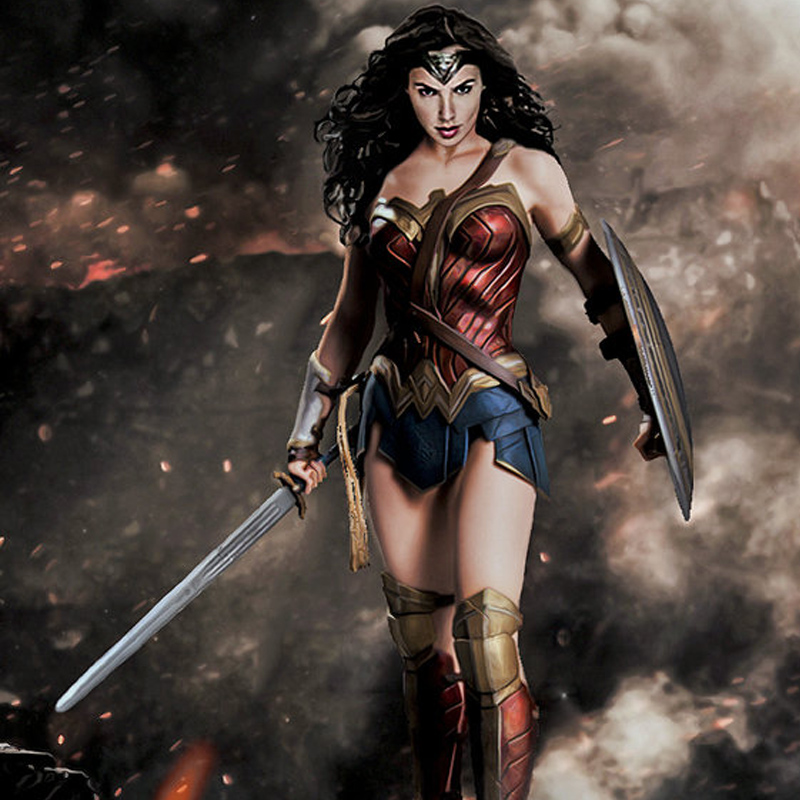

In [ ]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import spearmanr
import plotly.graph_objects as go
from plotly.offline import iplot
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/kaggle/input/women-entrepreneurship-and-labor-force/Dataset3.csv", delimiter=';', encoding = "ISO-8859-1")

In [ ]:
# check columns
df.head()

In [ ]:
# check non-null and Dtype
df.info()

In [ ]:
# check corr with heatmap
corr_matrix = df.drop(['No', 'Country', 'Currency'], axis=1).corr() 
sns.heatmap(corr_matrix, cmap='Reds', linecolor='black')

In [ ]:
# Top countries of Women Entrepreneurship Index
wei =  df.groupby('Country')['Women Entrepreneurship Index'].sum().reset_index() #группируем по названию издательства, указав количество и обнуляем их индекс
wei = wei.sort_values('Women Entrepreneurship Index',ascending=False).reset_index() #сортируем по возрастанию
wei.drop("index",axis = 1,inplace=True)

fig = go.Figure()



fig.add_trace(
    go.Bar(x=wei['Country'][:5],
           y=wei['Women Entrepreneurship Index'][:5],
           name="Top 5",
           marker={'color':wei['Women Entrepreneurship Index'][:5],'colorscale': 'Earth'}))
fig.add_trace(
    go.Bar(x=wei['Country'][:10],
           y=wei['Women Entrepreneurship Index'][:10],
           name="Top 10",
           marker={'color':wei['Women Entrepreneurship Index'][:10],'colorscale': 'Earth'},
           visible=False))
fig.add_trace(
    go.Bar(x=wei['Country'][:25],
           y=wei['Women Entrepreneurship Index'][:25],
           name="Top 25",
           marker={'color':wei['Women Entrepreneurship Index'][:25],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=wei['Country'],
           y=wei['Women Entrepreneurship Index'],
           name="All",
           marker={'color':wei['Women Entrepreneurship Index'],'colorscale': 'Earth'},
           visible=False))


fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 5",
                     method="update",
                     args=[{"visible": [True, False,False, False]},
                           {"title": "Top 5"}]),
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [False, True,False, False]},
                           {"title": "Top 10"}]),
                dict(label="Top 25",
                     method="update",
                     args=[{"visible": [False, False,True, False]},
                           {"title": "Top 25"}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [False, False,False, True]},
                           {"title": "All"}]),
            ]),
        )
    ])


fig.update_layout(
    title_text="Top Women Entrepreneurship Index",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

In [ ]:
# Top countries of Entrepreneurship Index
ei =  df.groupby('Country')['Entrepreneurship Index'].sum().reset_index() #группируем по названию издательства, указав количество и обнуляем их индекс
ei = ei.sort_values('Entrepreneurship Index',ascending=False).reset_index() #сортируем по возрастанию
ei.drop("index",axis = 1,inplace=True)

fig = go.Figure()



fig.add_trace(
    go.Bar(x=ei['Country'][:5],
           y=ei['Entrepreneurship Index'][:5],
           name="Top 5",
           marker={'color':ei['Entrepreneurship Index'][:5],'colorscale': 'magma'}))
fig.add_trace(
    go.Bar(x=ei['Country'][:10],
           y=ei['Entrepreneurship Index'][:10],
           name="Top 10",
           marker={'color':ei['Entrepreneurship Index'][:10],'colorscale': 'magma'},
           visible=False))
fig.add_trace(
    go.Bar(x=ei['Country'][:25],
           y=ei['Entrepreneurship Index'][:25],
           name="Top 25",
           marker={'color':ei['Entrepreneurship Index'][:25],'colorscale': 'magma'},
           visible=False))

fig.add_trace(
    go.Bar(x=ei['Country'],
           y=ei['Entrepreneurship Index'],
           name="All",
           marker={'color':ei['Entrepreneurship Index'],'colorscale': 'magma'},
           visible=False))


fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 5",
                     method="update",
                     args=[{"visible": [True, False,False, False]},
                           {"title": "Top 5"}]),
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [False, True,False, False]},
                           {"title": "Top 10"}]),
                dict(label="Top 25",
                     method="update",
                     args=[{"visible": [False, False,True, False]},
                           {"title": "Top 25"}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [False, False,False, True]},
                           {"title": "All"}]),
            ]),
        )
    ])


fig.update_layout(
    title_text="Top Entrepreneurship Index",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

In [ ]:
# Top countries of Female Labor Force Participation Rate
fl =  df.groupby('Country')['Female Labor Force Participation Rate'].sum().reset_index() #группируем по названию издательства, указав количество и обнуляем их индекс
fl = fl.sort_values('Female Labor Force Participation Rate',ascending=False).reset_index() #сортируем по возрастанию
fl.drop("index",axis = 1,inplace=True)

fig = go.Figure()



fig.add_trace(
    go.Bar(x=fl['Country'][:5],
           y=fl['Female Labor Force Participation Rate'][:5],
           name="Top 5",
           marker={'color':fl['Female Labor Force Participation Rate'][:5],'colorscale': 'inferno'}))
fig.add_trace(
    go.Bar(x=fl['Country'][:10],
           y=fl['Female Labor Force Participation Rate'][:10],
           name="Top 10",
           marker={'color':fl['Female Labor Force Participation Rate'][:10],'colorscale': 'inferno'},
           visible=False))
fig.add_trace(
    go.Bar(x=fl['Country'][:25],
           y=fl['Female Labor Force Participation Rate'][:25],
           name="Top 25",
           marker={'color':fl['Female Labor Force Participation Rate'][:25],'colorscale': 'inferno'},
           visible=False))

fig.add_trace(
    go.Bar(x=fl['Country'],
           y=fl['Female Labor Force Participation Rate'],
           name="All",
           marker={'color':fl['Female Labor Force Participation Rate'],'colorscale': 'inferno'},
           visible=False))


fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 5",
                     method="update",
                     args=[{"visible": [True, False,False, False]},
                           {"title": "Top 5"}]),
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [False, True,False, False]},
                           {"title": "Top 10"}]),
                dict(label="Top 25",
                     method="update",
                     args=[{"visible": [False, False,True, False]},
                           {"title": "Top 25"}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [False, False,False, True]},
                           {"title": "All"}]),
            ]),
        )
    ])


fig.update_layout(
    title_text="Top Entrepreneurship Index",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

In [ ]:
# research inflation rate
trace0 = go.Scatter(
    x=df.Country,
    y=df['Inflation rate'],
    name='Inflation rate'
)

data = [trace0]
layout = {'title': 'Inflation rate for Countries'}


fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [ ]:
# create crosstab
# and so we can see that all developing countries are not members of the European Union Membership
pd.crosstab(df['Level of development'], df['European Union Membership'], margins = True)

In [ ]:
# Method Chi-Square
table_lod_eum = [[20, 7], [0, 24]]
Chi2, p, dof, expected = chi2_contingency(table_lod_eum)
print("Degrees of freedom: ", dof)
print()
print("Expected result :", expected)
print()
prob = 0.95
critical = chi2.ppf(prob, dof)
print('Probability=%.3f, Critical=%.3f, Chi2=%.3f' % (prob, critical, Chi2))
print()
if abs(Chi2) >= critical:
    print('Dependent (reject H0)')
    print()
else:
    print('Independent (fail to reject H0)')
    print()
alpha = 1 - prob
print('Significanc=%.3f, P-value=%.3f' % (alpha, p))
print()
if p <= alpha:
    print('Dependent (reject H0)')
    print()
else:
    print('Independent (fail to reject H0)')
    print()

Chi2 = 26.22, Critical = 3.84. Chi2 > Critical, so we reject the H0, because indicators are dependent.

P-value = 3.04, Signifinance = 0,05. P-value > Signifinance, so we reject the H0, because indicators are dependent.

Assuming that the country's level of development and participation in the European Union are not related, the probability of such or even more pronounced differences was 0.04

In [ ]:
# create table with natural observations
eup_lod = {'Level of development':['Developed', 'Developing'], 'Member':[20, 0], 'Not_Member':[7, 24]}
df_eup_lod = pd.DataFrame(data=eup_lod)
# create table with expected observations
eup_lod1= {'Level of development':['Developed', 'Developing'], 'Member':[11, 9], 'Not_Member':[16, 15]}
df_eup_lod1= pd.DataFrame(data=eup_lod1)
print("Table with natural values")
print()
print(df_eup_lod)
print()
print("Table with expected values")
print()
print(df_eup_lod1)

In [ ]:
# group natural observations
group_eup_lod_mem = df_eup_lod.groupby('Level of development')[['Member']].sum()
group_eup_lod_not_mem = df_eup_lod.groupby('Level of development')[['Not_Member']].sum()
# group expected observations
group_eup_lod_mem1 = df_eup_lod1.groupby('Level of development')[['Member']].sum()
group_eup_lod_not_mem1 = df_eup_lod1.groupby('Level of development')[['Not_Member']].sum()

In [ ]:
# comparison of natural and expected observations
trace0 = go.Bar(
    x=group_eup_lod_mem.index,
    y=group_eup_lod_mem.Member,
    name='Natural values (Member)'
)

trace1 = go.Bar(
    x=group_eup_lod_mem1.index,
    y=group_eup_lod_mem1.Member,
    name='Expected values (Member)'
)

trace2 = go.Bar(
    x=group_eup_lod_not_mem.index,
    y=group_eup_lod_not_mem.Not_Member,
    name='Natural values (Not Member)'
)

trace3 = go.Bar(
    x=group_eup_lod_not_mem1.index,
    y=group_eup_lod_not_mem1.Not_Member,
    name='Expected values (Not Member)'
)

data = [trace0, trace1, trace2, trace3]
layout = {'title': 'Natural and expected values', 'xaxis': {'title': 'Level of development'}}


fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [ ]:
# check values Women Entrepreneurship Index for Member and Not Member
df_mem = df.loc[:19, :]
df_not_mem = df.loc[20:, :]

trace0 = go.Scatter(
    x=df_mem.index,
    y=df_mem['Women Entrepreneurship Index'],
    name='Member'
)


trace1 = go.Scatter(
    x=df_not_mem.index,
    y=df_not_mem['Women Entrepreneurship Index'],
    name='Not Member'
)


data = [trace0, trace1]
layout = {'title': 'Index values for Member and Not Member'}


fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [ ]:
# create variables for Method Mann-Whitney 
X = df[df['European Union Membership'] == "Member"]['Women Entrepreneurship Index']
Y = df[df['European Union Membership'] == "Not Member"]['Women Entrepreneurship Index']

In [ ]:
# check data outliers X
fig = px.box(X, width=400, height=400)
fig.show()

In [ ]:
# check data outliers Y
fig = px.box(Y, width=400, height=400)
fig.show()

In [ ]:
# search outliers Y
Y

In [ ]:
# drop outliers Y
Y = Y.drop([20, 21, 23, 25])

In [ ]:
# Method Mann-Whitney 
stat, p = stats.mannwhitneyu(X,Y)
print('p=%.8f' % (p))
print()
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Different distribution because p < alpha

In [ ]:
# check values Entrepreneurship Index for Member and Not Member
df_mem1 = df.loc[:19, :]
df_not_mem1 = df.loc[20:, :]

trace0 = go.Scatter(
    x=df_mem1.index,
    y=df_mem1['Entrepreneurship Index'],
    name='Member'
)


trace1 = go.Scatter(
    x=df_not_mem1.index,
    y=df_not_mem1['Entrepreneurship Index'],
    name='Not Member'
)


data = [trace0, trace1]
layout = {'title': 'Index values for Member and Not Members'}


fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [ ]:
# creating variables for Method Mann-Whitney 
X1 = df[df['European Union Membership'] == "Member"]['Entrepreneurship Index']
Y1 = df[df['European Union Membership'] == "Not Member"]['Entrepreneurship Index']

In [ ]:
# check outliers X1
fig = px.box(X1, width=400, height=400)
fig.show()

In [ ]:
# check outliers Y1
fig = px.box(Y1, width=400, height=400)
fig.show()

In [ ]:
# Method Mann-Whitney 
stat, p = stats.mannwhitneyu(X1,Y1)
print('p=%.4f' % (p))
print()
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Different distribution because p < alpha

In [ ]:
# Check Spearman Correlation Coefficient between Women's Entrepreneurship Index and Global Entrepreneurship Index
X2 = df['Women Entrepreneurship Index']
Y2 = df['Entrepreneurship Index']
coef, p = spearmanr(X2, Y2)
print('Spearmans correlation coefficient: %.2f' % coef)
print()
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.20f' % p)
else:
    print('Samples are correlated (reject H0) p=%.20f' % p)

higher correlation